SRA  is optimizing "Ackley Function"
Run 1: Best Fitness = 3.026596
SRA  is optimizing "Ackley Function"
Run 2: Best Fitness = 3.734203
SRA  is optimizing "Ackley Function"
Run 3: Best Fitness = 3.027111
SRA  is optimizing "Ackley Function"
Run 4: Best Fitness = 2.013322
SRA  is optimizing "Ackley Function"
Run 5: Best Fitness = 3.404160
SRA  is optimizing "Ackley Function"
Run 6: Best Fitness = 5.091971
SRA  is optimizing "Ackley Function"
Run 7: Best Fitness = 2.013328
SRA  is optimizing "Ackley Function"
Run 8: Best Fitness = 0.002277
SRA  is optimizing "Ackley Function"
Run 9: Best Fitness = 2.813600
SRA  is optimizing "Ackley Function"
Run 10: Best Fitness = 3.574032

=== Results ===
Best Fitness: 0.002277
Worst Fitness: 5.091971
Mean Fitness: 2.870060
Standard Deviation: 1.273146

Best Parameters:
x1: -0.000019
x2: -0.000005
x3: 0.000410
x4: 0.000015
x5: 0.000701
x6: 0.000317
x7: -0.000296
x8: -0.000844
x9: -0.000799
x10: -0.000996


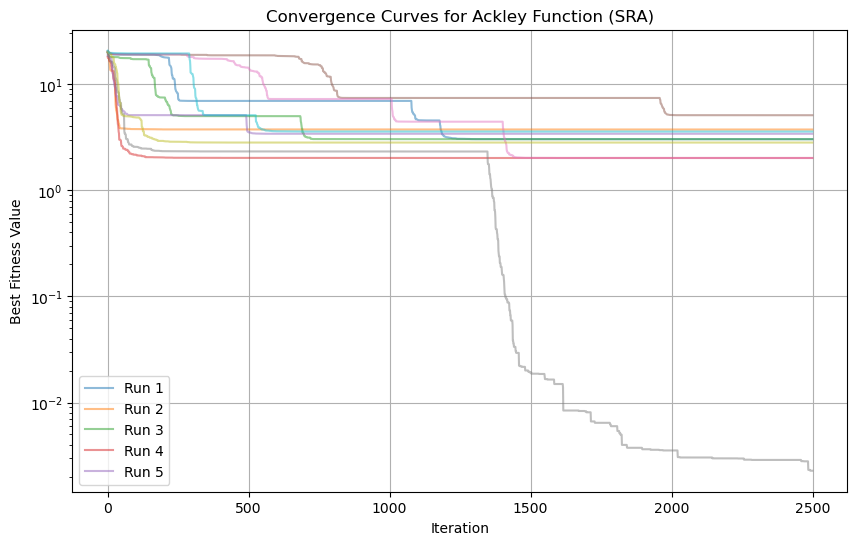

In [4]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt

# Solution class to store optimization results
class solution:
    def __init__(self):
        self.best = float('inf')
        self.bestIndividual = []
        self.convergence = []
        self.optimizer = ""
        self.objfname = ""
        self.startTime = ""
        self.endTime = ""
        self.executionTime = 0

# Objective function class for Ackley
class ObjectiveFunction:
    def __init__(self, dim):
        self.dim = dim
    
    def evaluate(self, x):
        # Ackley function: 
        # f(x) = -20 * exp(-0.2 * sqrt(1/d * sum(x_i^2))) - exp(1/d * sum(cos(2*pi*x_i))) + 20 + e
        term1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / self.dim))
        term2 = -np.exp(np.sum(np.cos(2 * np.pi * x)) / self.dim)
        cost = term1 + term2 + 20 + np.e
        return cost

# Levy flight function
def Levy(dim):
    beta = 1.5
    sigma = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) / 
             (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = 0.01 * np.random.randn(dim) * sigma
    v = np.random.randn(dim)
    zz = np.power(np.absolute(v), (1 / beta))
    step = np.divide(u, zz)
    return step

# SRA Algorithm
def SRA24(objf, lb, ub, dim, PopSize, iters, function_name):
    s = solution()
    
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    lb = np.array(lb)
    ub = np.array(ub)
    
    L = 0.5
    h = 6.625e-34
    h2 = h**2
    Cost = np.full(PopSize, float("inf"))
    pos = np.zeros((PopSize, dim))
    Psai = np.zeros((PopSize, dim))
    for i in range(dim):
        pos[:, i] = np.random.uniform(0, 1, PopSize) * (ub[i] - lb[i]) + lb[i]
    
    for i in range(PopSize):
        for j in range(dim):
            pos[i, j] = np.clip(pos[i, j], lb[j], ub[j])
            Psai[i, j] = np.sin(pos[i, j])
        Cost[i] = objf.evaluate(pos[i, :])
    
    SmellOrder = np.sort(Cost)
    SmellIndex = np.argsort(Cost)
    Worst_Cost = SmellOrder[PopSize - 1]
    Best_Cost = SmellOrder[0]
    sorted_population = pos[SmellIndex, :]
    Best_X = sorted_population[0, :]
    sorted_Psai = Psai[SmellIndex, :]
    Best_Psai = sorted_Psai[0, :]
    Worst_Psai = sorted_Psai[PopSize - 1, :]
    
    convergence_curve = np.zeros(iters)
    
    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    print('SRA  is optimizing "' + function_name + '"')
    
    for l in range(iters):
        b = 1 - (l ** (1.0 / 5)) / (iters ** (1.0 / 5))
        
        SmellOrder = np.sort(Cost)
        SmellIndex = np.argsort(Cost)
        sorted_Psai = Psai[SmellIndex, :]
        Best_Psai = sorted_Psai[0, :]
        Worst_Psai = sorted_Psai[PopSize - 1, :]
        
        Seq = np.array(range(PopSize))
        R = PopSize - Seq
        p = np.sqrt(R / PopSize)
        
        for i in range(PopSize):
            h2 = p[i]
            Xnew = np.zeros(dim)
            vc = np.random.uniform(-b, b, dim)
            Z = Levy(dim)
            k = 1
            if random.random() < 0.03:
                Xnew = (ub - lb) * np.random.uniform(0, 1, size=dim) + lb
            else:
                ids_except_current = [_ for _ in range(PopSize) if _ != i]
                id_1, id_2 = random.sample(ids_except_current, 2)
                Threshold=1-numpy.exp(-4*(l/iters)**2)
                if np.abs(p[i]) < Threshold:
                    if np.random.rand() < 0.5:
                        Xnew = k * random.random() + 2 * pos[i, :] - pos[i - 1, :]
                    else:
                        Xnew = Best_X - 0.1 * Z + np.random.rand() * ((ub - lb) * np.random.rand() + lb)
                else:
                    pos_1 = Best_X + random.random() * vc * (h * (Best_Psai - Worst_Psai) + 
                            (h2 * (Psai[id_1, :] - 2 * Psai[i, :] + Psai[id_2, :]))) / Psai[i, :]
                    pos_2 = pos[i, :] + random.random() * vc * (h * (Best_Psai - Worst_Psai) + 
                            (h2 * (Psai[id_1, :] + 2 * Psai[i, :] + Psai[id_2, :]))) / Psai[i, :]
                    Xnew = np.where(np.random.uniform(0, 1) < p[i], pos_1, pos_2)
            
            Xnew = np.clip(Xnew, lb, ub)
            
            Xnew_Cost = objf.evaluate(Xnew)
            if Cost[i] > Xnew_Cost:
                Cost[i] = Xnew_Cost
                pos[i, :] = Xnew
                if Cost[i] < Best_Cost:
                    Best_X = pos[i, :]
                    Best_Cost = Cost[i]
            if Cost[i] > Worst_Cost:
                Worst_Cost = Cost[i]
            
            Psai[i, :] = np.sin(random.random() * pos[i, :])
        
        convergence_curve[l] = Best_Cost
    
    timerEnd = time.time()
    s.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    s.executionTime = timerEnd - timerStart
    s.convergence = convergence_curve
    s.optimizer = "SRA++"
    s.objfname = function_name
    s.best = Best_Cost
    s.bestIndividual = Best_X
    
    return s

# Main execution
def main():
    # Define parameters
    dim = 10  # Dimension of Ackley function
    bounds = [(-32.768, 32.768)] * dim  # Bounds for each dimension
    lb = [b[0] for b in bounds]
    ub = [b[1] for b in bounds]
    PopSize = 30
    iters = 2500
    n_runs = 10
    function_name = "Ackley Function"
    
    # Objective function
    objf = ObjectiveFunction(dim)
    
    # Store results
    best_fitnesses = []
    best_solutions = []
    convergence_curves = []
    
    # Run SRA multiple times
    for run in range(n_runs):
        s = SRA24(objf, lb, ub, dim, PopSize, iters, function_name)
        best_fitnesses.append(s.best)
        best_solutions.append(s.bestIndividual)
        convergence_curves.append(s.convergence)
        print(f"Run {run + 1}: Best Fitness = {s.best:.6f}")
    
    # Calculate statistics
    best_fitnesses = np.array(best_fitnesses)
    best_idx = np.argmin(best_fitnesses)
    worst_idx = np.argmax(best_fitnesses)
    
    print("\n=== Results ===")
    print(f"Best Fitness: {best_fitnesses[best_idx]:.6f}")
    print(f"Worst Fitness: {best_fitnesses[worst_idx]:.6f}")
    print(f"Mean Fitness: {np.mean(best_fitnesses):.6f}")
    print(f"Standard Deviation: {np.std(best_fitnesses):.6f}")
    
    # Print best parameters
    best_params = best_solutions[best_idx]
    print("\nBest Parameters:")
    for i, param in enumerate(best_params):
        print(f"x{i+1}: {param:.6f}")
    
    # Plot convergence curves
    plt.figure(figsize=(10, 6))
    for run in range(n_runs):
        plt.plot(range(iters), convergence_curves[run], label=f'Run {run+1}' if run < 5 else None, alpha=0.5)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness Value')
    plt.title('Convergence Curves for Ackley Function (SRA)')
    plt.grid(True)
    plt.yscale('log')  # Log scale for better visualization of convergence
    plt.legend(loc='best')
    # plt.savefig('ackley_convergence.png')
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    main()